In [1]:
file = open('files/ch03/adult.data', 'r')

In [2]:
def chr_int(a):
    if a.isdigit():
        return int(a)
    else:
        return 0
                
data=[]
for line in file:
     data1=line.split(', ')
     if len(data1)==15:
        data.append([chr_int(data1[0]),data1[1],chr_int(data1[2]),data1[3],chr_int(data1[4]),data1[5],data1[6],\
            data1[7],data1[8],data1[9],chr_int(data1[10]),chr_int(data1[11]),chr_int(data1[12]),data1[13],\
            data1[14]])

In [3]:
print(data[1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [4]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame(data) #  Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes 

df.columns = ['age', 'type_employer', 'fnlwgt', 'education', 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country","income"]
df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


In [5]:
ml = df[(df.sex == 'Male')]
ml.shape

(21790, 15)

In [6]:
ml1 = df[(df.sex == 'Male')&(df.income=='>50K\n')]
ml1.shape


(6662, 15)

In [7]:
fm =df[(df.sex == 'Female')]
fm.shape

(10771, 15)

In [8]:
fm1 =df[(df.sex == 'Female')&(df.income=='>50K\n')]
fm1.shape

(1179, 15)

In [9]:
df.shape

(32561, 15)

In [10]:
df1=df[(df.income=='>50K\n')]

print('The rate of people with high income is: ', int(len(df1)/float(len(df))*100), '%.' )
print('The rate of men with high income is: ', int(len(ml1)/float(len(ml))*100), '%.')  
print('The rate of women with high income is: ', int(len(fm1)/float(len(fm))*100), '%.' ) 

The rate of people with high income is:  24 %.
The rate of men with high income is:  30 %.
The rate of women with high income is:  10 %.


In [11]:
print('The average age of men is: ', ml['age'].mean(), '.' ) 
print('The average age of women is: ', fm['age'].mean(), '.') 

The average age of men is:  39.43354749885268 .
The average age of women is:  36.85823043357163 .


In [12]:
ml_mu_hr = ml['hr_per_week'].mean()
fm_mu_hr = fm['hr_per_week'].mean()
ml_var_hr = ml['hr_per_week'].var()
fm_var_hr = fm['hr_per_week'].var()
ml_std_hr = ml['hr_per_week'].std()
fm_std_hr = fm['hr_per_week'].std()
print ('Statistics of hours per week for men: mu:', ml_mu_hr, 'var:', ml_var_hr, 'std:', ml_std_hr)
print ('Statistics  of hours per week for women: mu:', fm_mu_hr, 'var:', fm_var_hr, 'std:', fm_std_hr)

Statistics of hours per week for men: mu: 42.42808627810923 var: 146.88846717142022 std: 12.119755243874367
Statistics  of hours per week for women: mu: 36.410361154953115 var: 139.50679700047252 std: 11.81129954748725


In [13]:
ml_median= ml['age'].median()
fm_median= fm['age'].median()
print ("Median age per men and women: ", ml_median, fm_median)

ml_median_age= ml1['age'].median()
fm_median_age= fm1['age'].median()
print( "Median age per men and women with high-income: ", ml_median_age, fm_median_age)

Median age per men and women:  38.0 35.0
Median age per men and women with high-income:  44.0 41.0


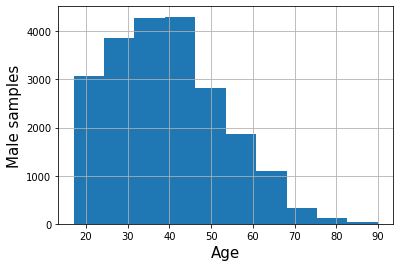

In [18]:
import matplotlib.pyplot as plt
ml_age=ml['age']
ml_age.hist(density=0, histtype='stepfilled', bins=10)

plt.xlabel('Age',fontsize=15)
plt.ylabel('Male samples',fontsize=15)
plt.show()

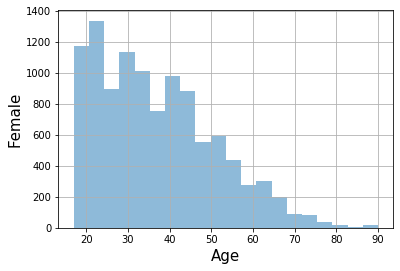

In [22]:
fm_age = fm['age']
fm_age.hist(density=0, histtype='stepfilled',alpha=.5, bins=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Female',fontsize=15)
plt.show()

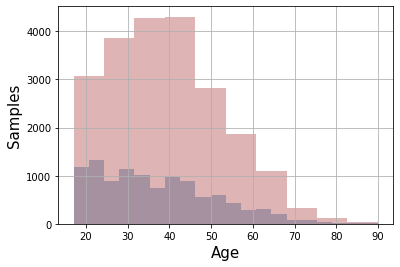

In [17]:
import seaborn as sns
fm_age=fm['age']
fm_age.hist(density=0, histtype='stepfilled',alpha=.5, bins=20)
ml_age.hist(density=0, histtype='stepfilled',alpha=.5, color=sns.desaturate("indianred", .75),bins=10)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Samples',fontsize=15)
plt.show()

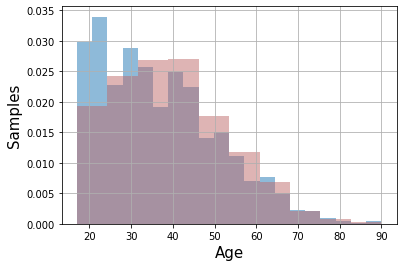

In [20]:
fm_age=fm['age']
fm_age.hist(density=1, histtype='stepfilled',alpha=.5, bins=20)
ml_age.hist(density=1, histtype='stepfilled',alpha=.5, color=sns.desaturate("indianred", .75),bins=10)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Samples',fontsize=15)
plt.show()

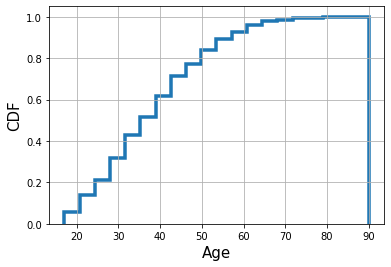

In [24]:
ml_age.hist(density=1, histtype='step', cumulative=True, linewidth=3.5, bins=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

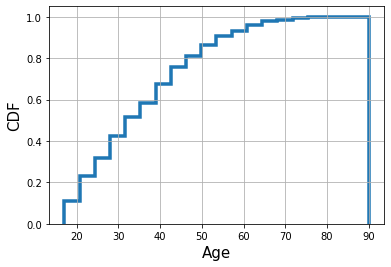

In [25]:
fm_age.hist(normed=1, histtype='step', cumulative=True, linewidth=3.5, bins=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

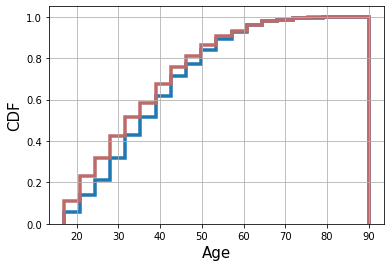

In [26]:
ml_age.hist(normed=1, histtype='step', cumulative=True,  linewidth=3.5, bins=20)
fm_age.hist(normed=1, histtype='step', cumulative=True,  linewidth=3.5, bins=20, color=sns.desaturate("indianred", .75))
plt.xlabel('Age',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

In [27]:
print("The mean sample difference is ", ml_age.mean() - fm_age.mean())

The mean sample difference is  2.5753170652810553


In [28]:
df['age'].median()

37.0